<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Text(0.5, 1.0, 'Confusion Matrix')

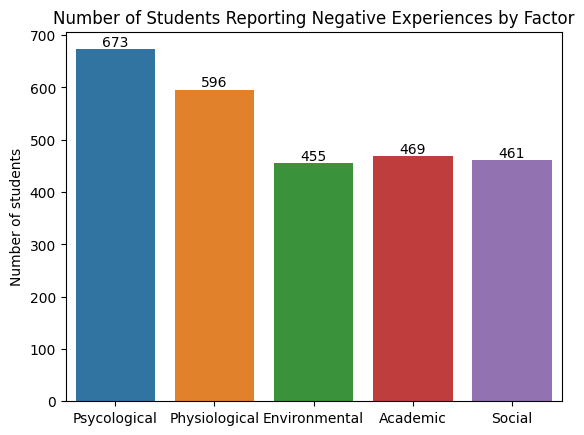

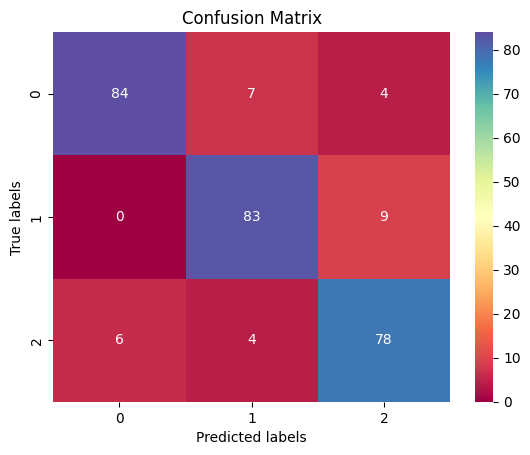

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#data is collected from the CSV file by using Pandas
stress = pd.read_csv("/content/StressLevelDataset.csv")

stress.head()

stress.info()

pd.set_option('display.max_columns', None)
stress.describe()


#Separate the psycological factor columns
mental_pos = stress[["anxiety_level", "depression", "self_esteem", "mental_health_history"]]
#Create a dictionary
mental_pos_count = {}
#Iterate over the PSYCOLOGICAL factor columns
for column,row in mental_pos.items():
    #If it is anxiety or depression we count the people who are in the upper 40%
    if column == "anxiety_level" or column == "depression":
        count = (row > np.percentile(mental_pos[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #Everyone who had history with mental diseases get counted
    elif column == "mental_health_history":
        count = row == 1
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #People who are in the lower 40% get counted for self-esteem
    else:
        count = (row < np.percentile(mental_pos[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
#Create a pandas dataframe
mental_pos_df = pd.DataFrame(mental_pos_count)
#Count every row where atleast one value is true
mental_number = len((mental_pos_df[(mental_pos_df >= 1).sum(axis=1) >= 1]))


#Separate the physiological factor columns
physical = stress[["headache", "blood_pressure", "sleep_quality", "breathing_problem"]]
#Create a dictionary
physical_dict = {}
#Iterate over the PHYSIOLOGICAL factor columns
for column,row in physical.items():
    #People in the upper 40% for headache, breathing problems or blood pressure get counted
    if column == "headache" or column == "breathing problem" or column == "blood_pressure":
        count = (row > np.percentile(physical[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(physical[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
#Create a pandas dataframe
physical_df = pd.DataFrame(physical_dict)
#Count every row where atleast one value is true
physical_number = len((physical_df[(physical_df >= 1).sum(axis=1) >= 1]))


#Separate the environmental factor columns
env = stress[["living_conditions", "safety", "basic_needs", "noise_level"]]
#Create a dictionary
env_dict = {}
#Iterate over the ENVIRONMENTAL factor columns
for column,row in env.items():
    #People in the upper 40% for noise level get counted
    if column == "noise_level":
        count = (row > np.percentile(env[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(env[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
#Create a pandas dataframe
env_df = pd.DataFrame(env_dict)
#Count every row where atleast one value is true
env_number = len((env_df[(env_df >= 1).sum(axis=1) >= 1]))


#Separate the academic factor columns
acad = stress[["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns"]]
#Create a dictionary
acad_dict = {}
#Iterate over the ACADEMIC factor columns
for column,row in acad.items():
    #People in the upper 40% for study load and future career concners get counted
    if column == "study_load" or column == "future_career_concerns":
        count = (row > np.percentile(acad[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
    #People in the lower 40% for academic performance or teacher student relationship get counted
    else:
        count = (row < np.percentile(acad[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
#Create a pandas dataframe
acad_df = pd.DataFrame(acad_dict)
#Count every row where atleast one value is true
acad_number = len((acad_df[(acad_df >= 1).sum(axis=1) >= 1]))


#Separate the social factor columns
social = stress.iloc[:, 16:20]
#Create a dictionary
social_dict = {}
#Iterate over the SOCIAL factor columns
for column,row in social.items():
    #People in the upper 40% for peer pressure, extracurricular activities and bullying get counted
    if column == "peer_pressure" or column == "extracurricular_activities" or column == "bullying":
        count = (row > np.percentile(social[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
    #People in the lower 40% for social support get counted
    else:
        count = (row < np.percentile(social[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
#Create a pandas dataframe
social_df = pd.DataFrame(social_dict)
#Count every row where atleast one value is true
social_number = len((social_df[(social_df >= 1).sum(axis=1) >= 1]))

# Print the number of students with psychological, physiological, social, environmental, and academic factors
print(f"\nNumber of students with Psychological factors: {mental_number}")
print(f"Number of students with Physiological factors: {physical_number}")
print(f"Number of students with Environmental factors: {env_number}")
print(f"Number of students with Academic factors: {acad_number}")
print(f"Number of students with Social factors: {social_number}\n")

#Create a pandas series from the numbers
neg = pd.Series([mental_number, physical_number, env_number, acad_number, social_number])
#Choose column names
col_names = ["Psycological", "Physiological", "Environmental", "Academic", "Social"]
#Create the barplot
ax = sns.barplot(x = col_names, y = neg.values)
#Name the plot
ax.set(title="Number of Students Reporting Negative Experiences by Factor")
#Show the number on top of the bar
ax.bar_label(ax.containers[0])
#Set the y label
ax.set_ylabel("Number of students");


#Separate the target variable from the features
X = stress.drop(["stress_level"], axis=1)
y = stress.stress_level

#Data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Create a StandardScaler object
scaler = StandardScaler()

#Fit the scaler to the training data
scaler.fit(X_train)

#Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {'n_neighbors': [1, 2, 3, 5, 6, 7, 9, 11, 13],
              'weights': ['uniform', 'distance']}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Get the best KNN model
best_knn = grid_search.best_estimator_

# Train the classifier using the training data
best_knn.fit(X_train_scaled, y_train)

#Make predictions on the test data
y_pred = best_knn.predict(X_test_scaled)

#Calculate and print the accuracy score
result = metrics.accuracy_score(y_pred, y_test)
print("\nTraining Accuracy: ", round(result, 4) * 100, "%", sep="")

#Make predictions on the test data
y_pred = best_knn.predict(X_test_scaled)

#Calculate and print the testing accuracy
test_accuracy = metrics.accuracy_score(y_pred, y_test)
print("Testing Accuracy:", round(test_accuracy, 4) * 100, "%", sep="")
print("\n")

#Calculate and print the classification report
classification_rep = metrics.classification_report(y_test, y_pred)
print(classification_rep)

#Create a confusion matrix
cm = metrics.confusion_matrix(np.asarray(y_test), np.asarray(y_pred))

#Create a figure object
fig = plt.figure()

#Add an ax object to the figure, create the visualization
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Spectral")

#Set the labels and the title
ax.set(xlabel="Predicted labels")
ax.set(ylabel="True labels")
ax.set_title("Confusion Matrix")

